<a href="https://colab.research.google.com/github/KK-Niraj/Credit-Card-Default-Prediction/blob/main/Credit_Card_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [52]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

In [53]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/EDA Capstone Projects/Machine Learning/Supervised ML - Classification/Default of credit card clients - Data.csv')

In [55]:
pd.set_option("display.max_columns", None)

In [56]:
# Check shape of dataset
dataset.shape

(30000, 25)

In [57]:
# Checking first 5 rows in dataset
dataset.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [58]:
# Checking last 5 rows in dataset
dataset.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,0,0,47929,48905,49764,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


## Features Description

We have records of 30000 customers. Below are the description of all features:

1. ID: ID of each client
2. LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
3. SEX: Gender (1=male, 2=female)
4. EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others)
5. MARRIAGE: Marital status (1=married, 2=single, 3=others)
6. AGE: Age in years
7. PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months,8=payment delay for eight months, 9=payment delay for nine months and above)
8. PAY_2: Repayment status in August, 2005 (scale same as above)
9. PAY_3: Repayment status in July, 2005 (scale same as above)
10. PAY_4: Repayment status in June, 2005 (scale same as above)
11. PAY_5: Repayment status in May, 2005 (scale same as above)
12. PAY_6: Repayment status in April, 2005 (scale same as above)
13. BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
14. BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
15. BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
16. BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
17. BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
18. BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
19. PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
20. PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
21. PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
22. PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
23. PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
24. PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
25. default.payment.next.month: Default payment (1=yes, 0=no)


In [59]:
# Checking basic information of our dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [60]:
# Exploring descriptive statistical parameters
dataset.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [61]:
# checking the total number of null values in every column
dataset.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [62]:
# checking for identical rows if present
dataset.duplicated().sum()

0

In [63]:
# Rename the columns
dataset = dataset.rename(columns={'default payment next month': 'DEFAULT_PAYMENT','PAY_0': 'PAY_1'})
dataset.head(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_PAYMENT
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1


## Exploratory Data Anlaysis

0    23364
1     6636
Name: DEFAULT_PAYMENT, dtype: int64


Text(0.5, 1.0, 'Default Credit Card Clients\n (Default = 1, Not Default = 0)')

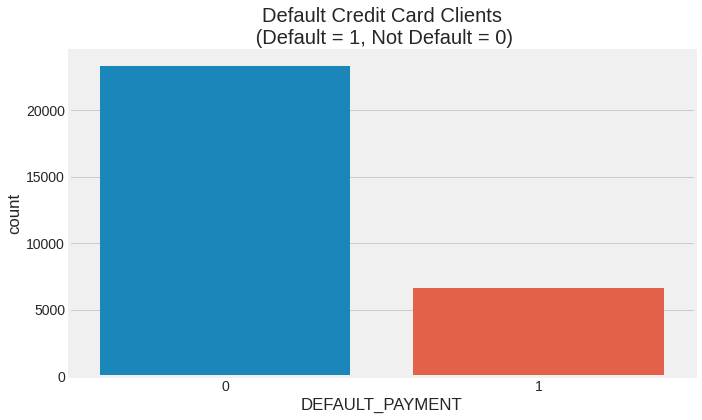

In [64]:
# plotting value counts of dependent variable
print(dataset['DEFAULT_PAYMENT'].value_counts())
plt.figure(figsize=(10,6))
plt.style.use('fivethirtyeight')
sns.countplot(x = 'DEFAULT_PAYMENT', data = dataset)
plt.title('Default Credit Card Clients\n (Default = 1, Not Default = 0)')

Defaulters are less as compared to the Non-Defaulters in the given dataset.

In [65]:
# Creating a list of categorical independent variable
independent_variable = ['SEX', 'EDUCATION', 'MARRIAGE', 'AGE']

In [66]:
# Value counts of the variable "independent_variable"
for col in independent_variable:
  print(dataset[col].value_counts())

2    18112
1    11888
Name: SEX, dtype: int64
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64
2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64
29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
72       3
75       3
71       3
79       1
74       1
Name: AGE, dtype: int64


In [67]:
# Replacing the value as according to feature description
dataset["EDUCATION"] = dataset["EDUCATION"].replace({0:4,5:4,6:4})
dataset["MARRIAGE"] = dataset["MARRIAGE"].replace({0:3})

In [68]:
# Value counts after replacing of "EDUCATION", "MARRIAGE"
print(dataset['EDUCATION'].value_counts())
print(dataset['MARRIAGE'].value_counts())

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64
2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64


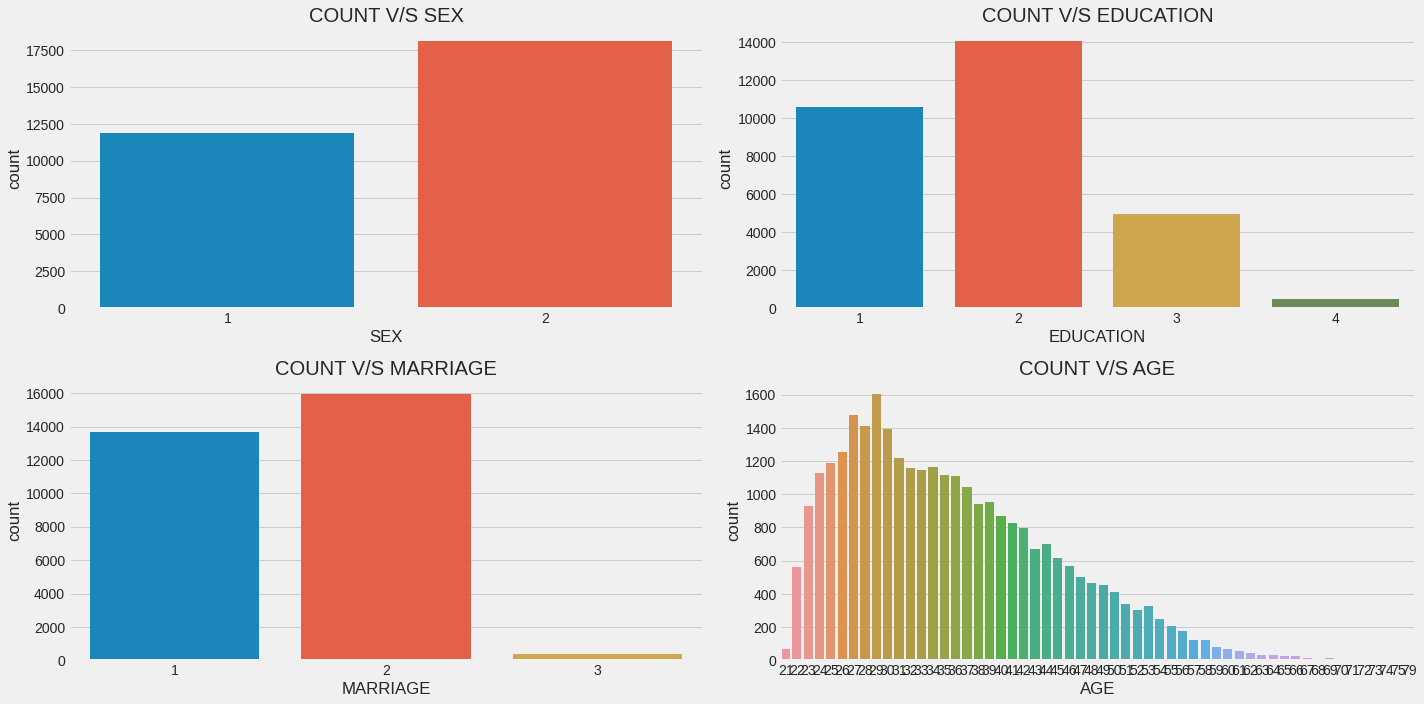

In [69]:
# Plotting the countplot graph for "independent_variable"
plt.figure(figsize=(20, 10))
rows=2   
cols=2
counter=1

for col in independent_variable:
  plt.subplot(rows,cols,counter)
  sns.countplot(x = col, data= dataset)
  plt.title(f'COUNT V/S {col}')
  counter=counter+1
  plt.tight_layout()

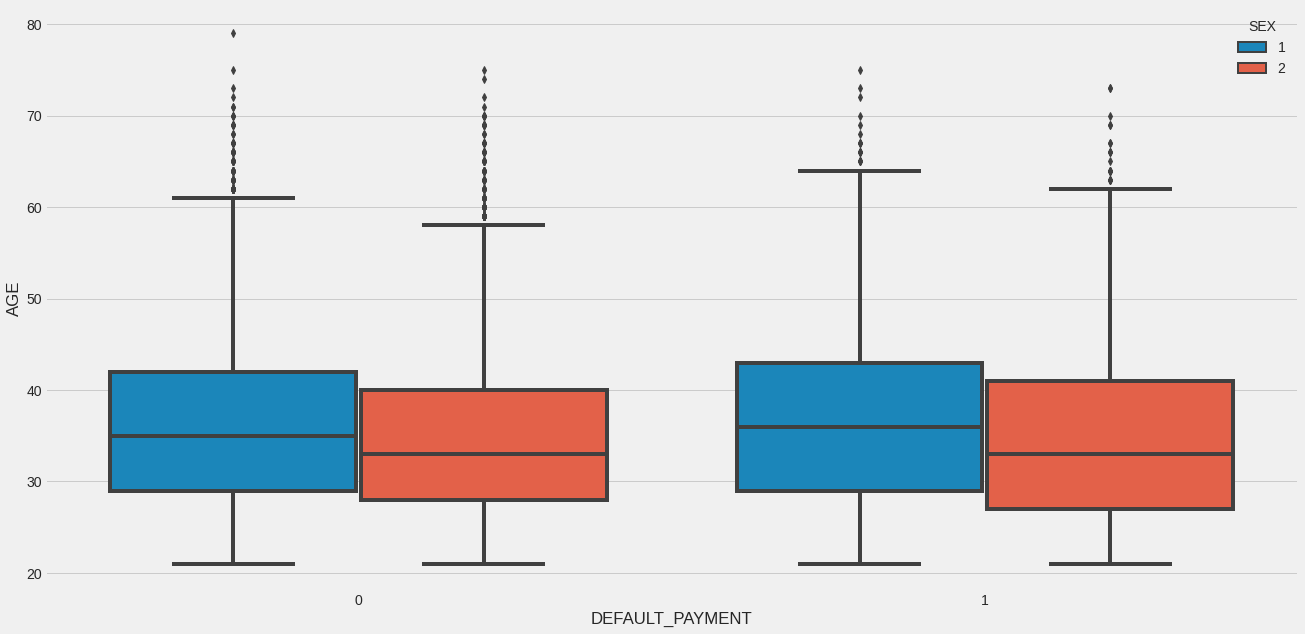

In [70]:
# Creating a box plot of AGE V/S DEFAULT_PAYMENT with respect to sex
plt.figure(figsize=(20,10))
sns.boxplot(x='DEFAULT_PAYMENT',hue='SEX', y='AGE',data=dataset)

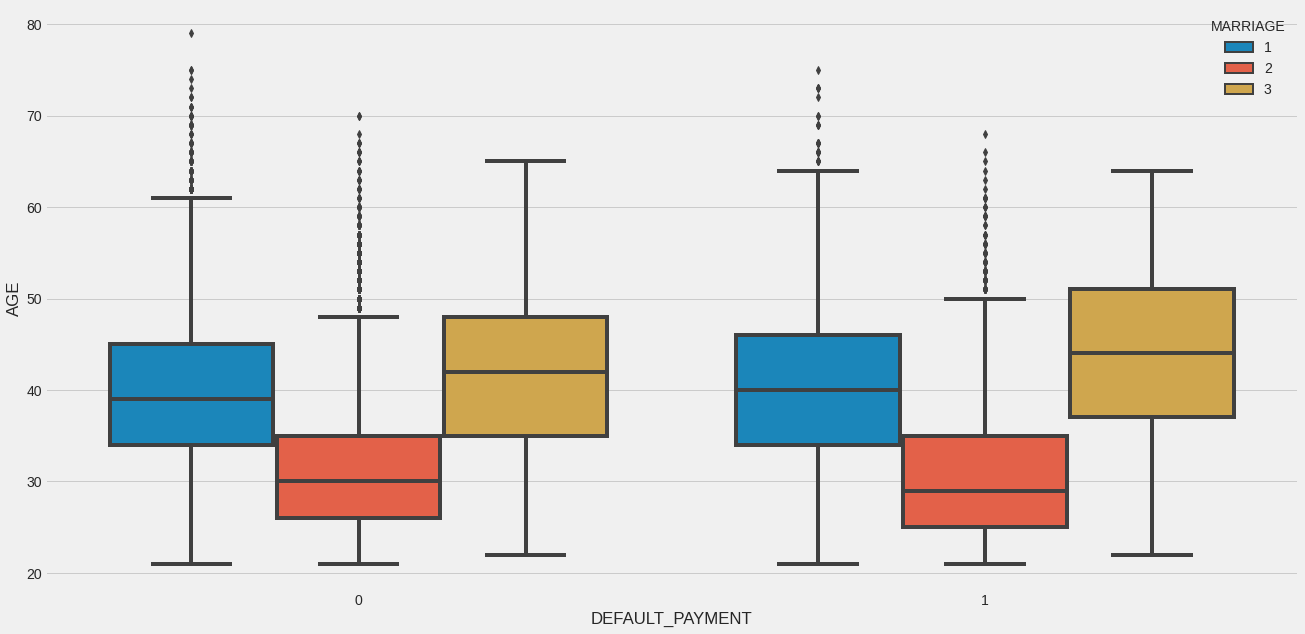

In [71]:
# Creating a box plot of AGE V/S DEFAULT_PAYMENT with respect to marriage
plt.figure(figsize=(20,10))
sns.boxplot(x='DEFAULT_PAYMENT',hue='MARRIAGE', y='AGE',data=dataset)

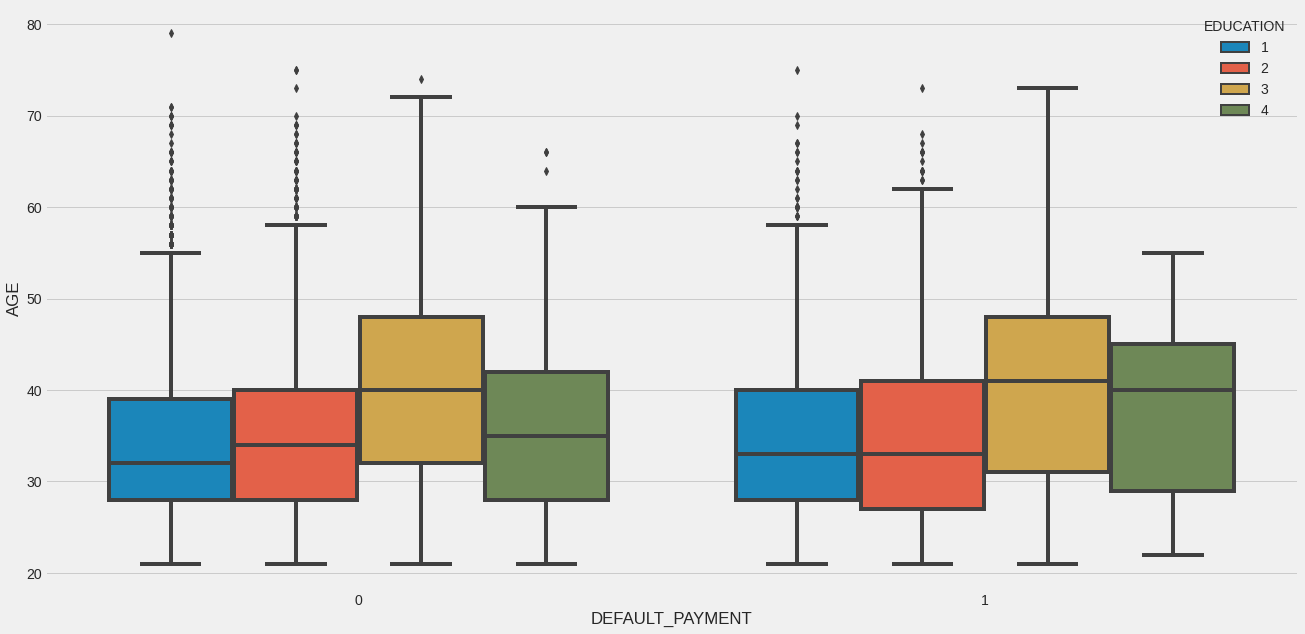

In [72]:
# Creating a box plot of AGE V/S DEFAULT_PAYMENT with respect to education
plt.figure(figsize=(20,10))
sns.boxplot(x='DEFAULT_PAYMENT',hue='EDUCATION', y='AGE',data=dataset)

In [73]:
# Creating a function to get columnn names in the given range.
def getColumnsNames(prefix):
  '''
  This function is used for columnn names in the given range.
  '''
  return [prefix+str(x) for x in range(1,7)]

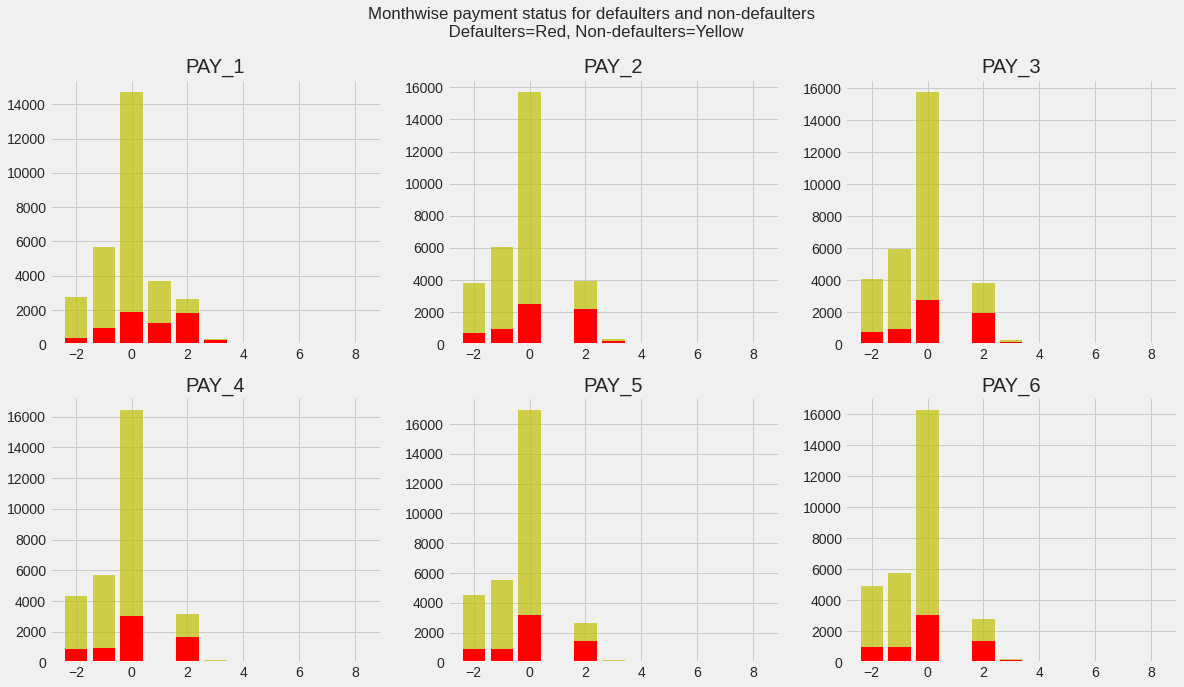

In [74]:
# PAY_1 , PAY_2 , PAY_3 , PAY_4 , PAY_5, PAY_6
pay_status_columns = getColumnsNames('PAY_')
figure, ax = plt.subplots(2,3)
figure.set_size_inches(18,10)
for i in range(len(pay_status_columns)):
    row,col = int(i/3), i%3

    d = dataset[pay_status_columns[i]].value_counts()
    x = dataset[pay_status_columns[i]][(dataset['DEFAULT_PAYMENT']==1)].value_counts()
    ax[row,col].bar(d.index, d, align='center', color='y',alpha = 0.7)
    ax[row,col].bar(x.index, x, align='center', color='red')
    ax[row,col].set_title(pay_status_columns[i])
    plt.suptitle("Monthwise payment status for defaulters and non-defaulters \n Defaulters=Red, Non-defaulters=Yellow")

The above figure shows bar plot for each month payment status which show the count of defaulters and non-defaulter.

In [75]:
def plot_graph(prefix):
  pay_columns = getColumnsNames(prefix)
  figure, ax = plt.subplots(3,2)
  figure.set_size_inches(18,10)
  for i in range(len(pay_columns)):
    row,col =  i%3, int(i/3)

    ax[row,col].hist(dataset[pay_columns[i]], 30, color='y',alpha = 0.7)
    ax[row,col].hist(dataset[pay_columns[i]][(dataset['DEFAULT_PAYMENT']==1)],30,color='red')
    ax[row,col].set_title(pay_columns[i])
    plt.suptitle(f"Monthwise {prefix} distribution for defaulters and non-defaulters \n Defaulters=Red, Non-defaulters=Yellow")
    #adding scaling to make the graph more helpful
    ax[row,col].set_yscale('log', nonposy='clip')

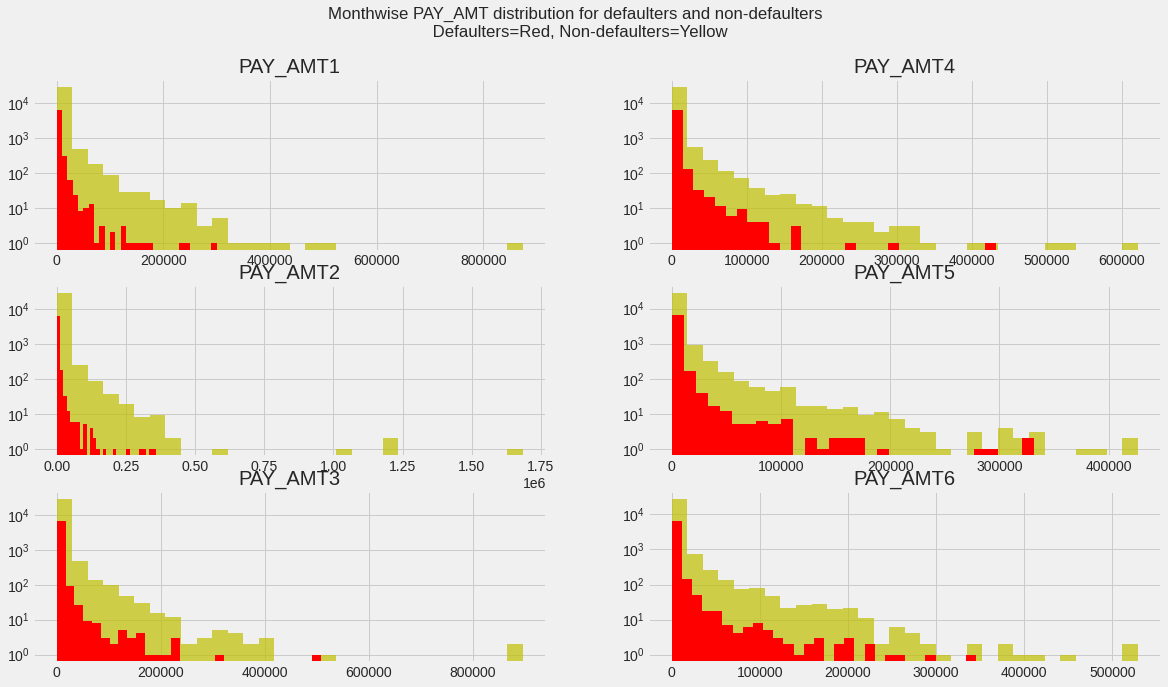

In [76]:
plot_graph('PAY_AMT')

The above histogram shows the distribution of payment amount for each month explicitly for defaulters and non-defaulters.

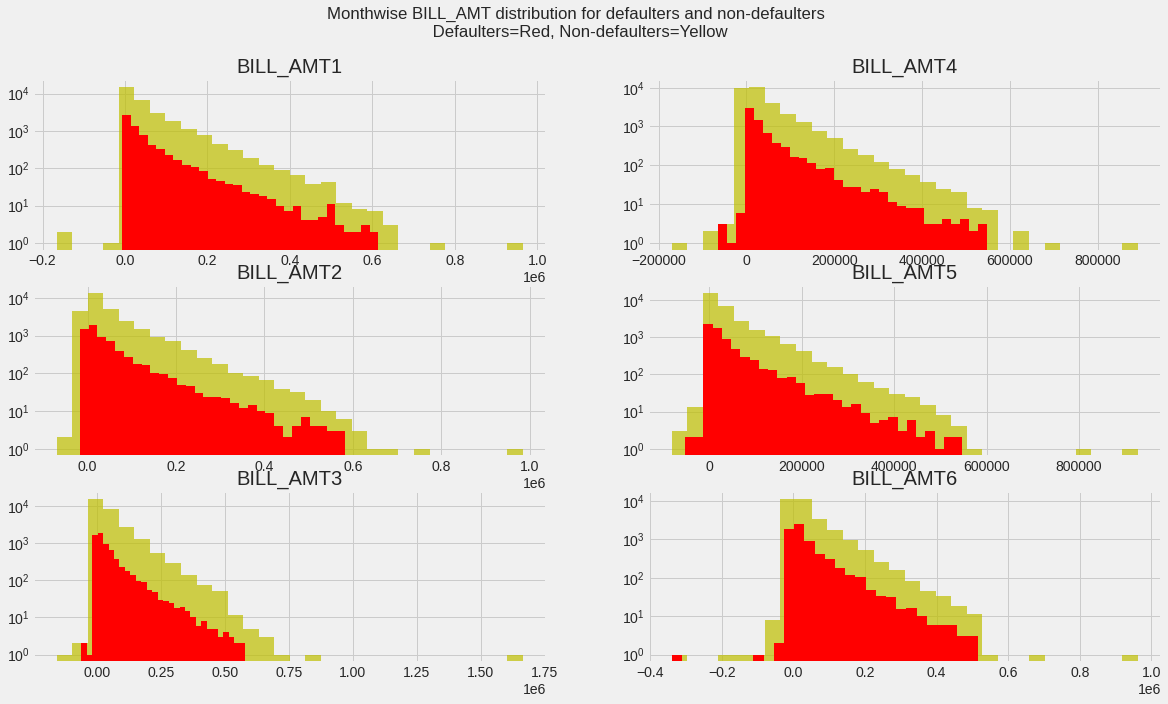

In [77]:
plot_graph('BILL_AMT')

The above histogram shows the distribution of Bill amount generated for each month explicitly for defaulters and non-defaulters.

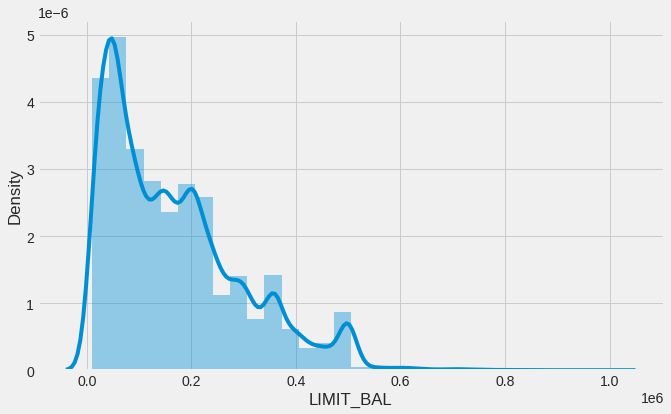

In [78]:
# Creating a distplot for "LIMIT_BAL"
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,6))
sns.distplot(dataset['LIMIT_BAL'],kde=True,bins=30)

## Correlation

In [79]:
# Dropping the column "ID"
dataset = dataset.drop(['ID'],axis=1)

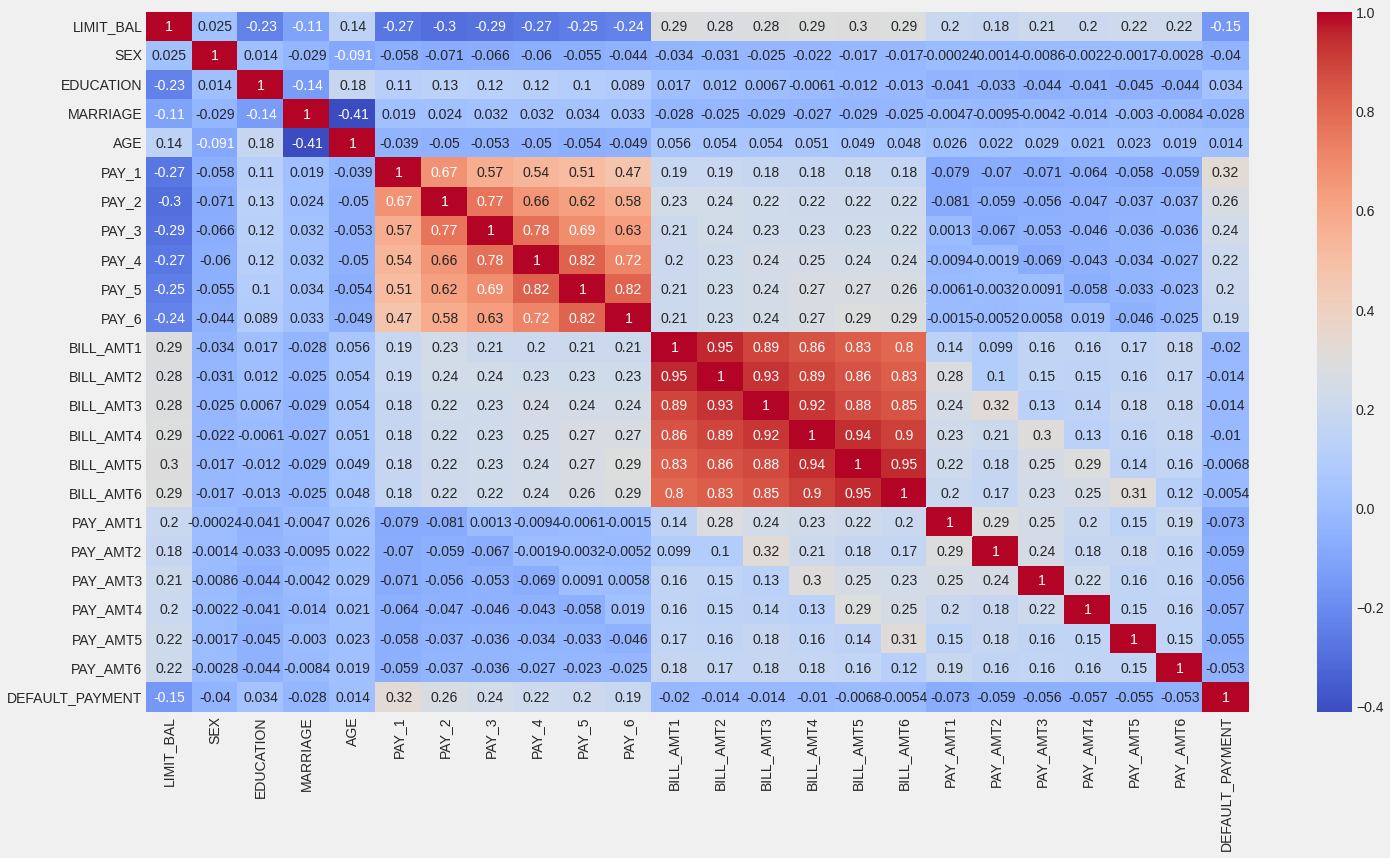

In [80]:
# Finding the correlation between different attribute
plt.figure(figsize=(22,12))
sns.heatmap(dataset.corr(),annot=True,cmap="coolwarm")

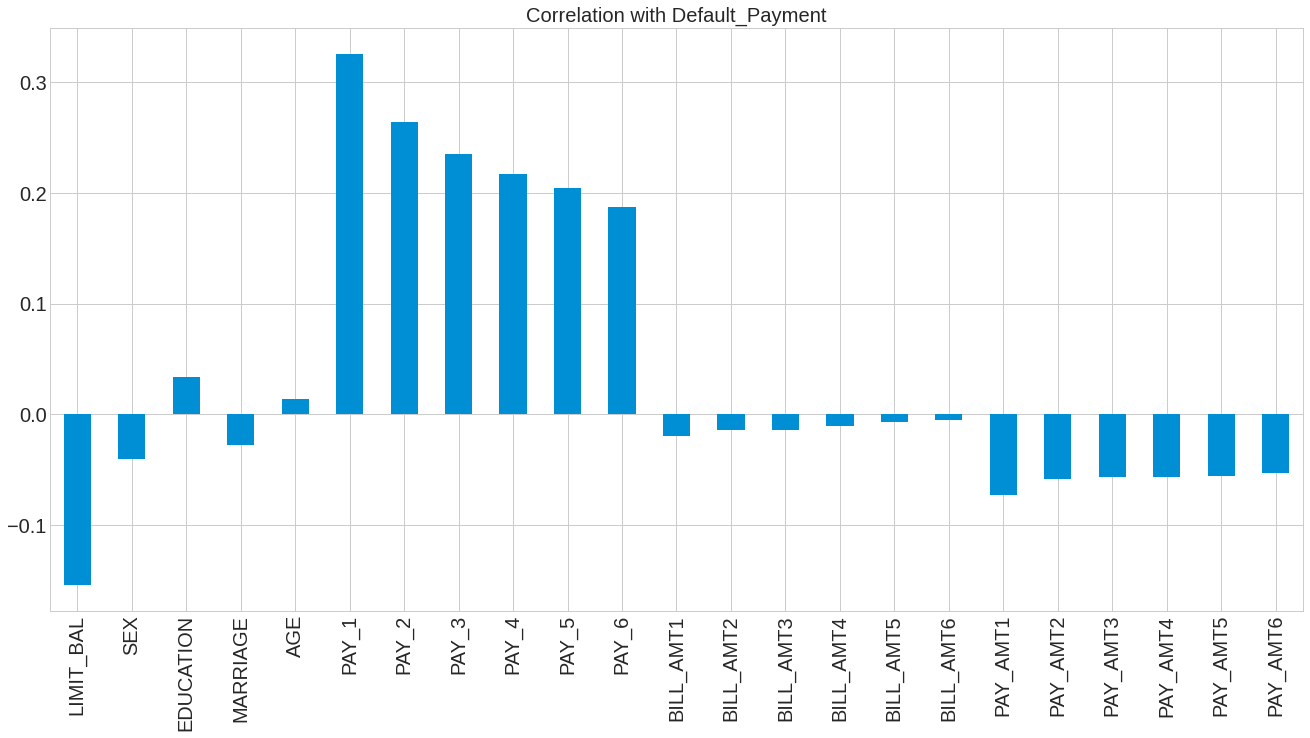

In [81]:
# Correlation between independent variables and dependent variable.
X = dataset.drop(['DEFAULT_PAYMENT'],axis=1)
plt.style.use('seaborn-whitegrid')
X.corrwith(dataset['DEFAULT_PAYMENT']).plot.bar(figsize = (20, 10), title = "Correlation with Default_Payment", 
                                        fontsize = 20,rot = 90, grid = True)

It seems from the above graph is that most negatively correlated feature is LIMIT_BAL but we cannot blindly remove this feature because it may be important feature for prediction.

## SMOTE (Synthetic Minority Oversampling Technique)

In [82]:
# Importing SMOTE
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

In [83]:
# Creating a SMOTE function.
smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, dataset['DEFAULT_PAYMENT'])

print('Original shape of Dataset', len(X))
print('Resampled shape of Dataset', len(y_smote))

Original shape of Dataset 30000
Resampled shape of Dataset 46728


In [84]:
# Creating a new dataframe after using SMOTE
balance_df = pd.DataFrame(x_smote, columns = list(X.columns))
balance_df['DEFAULT_PAYMENT'] = y_smote

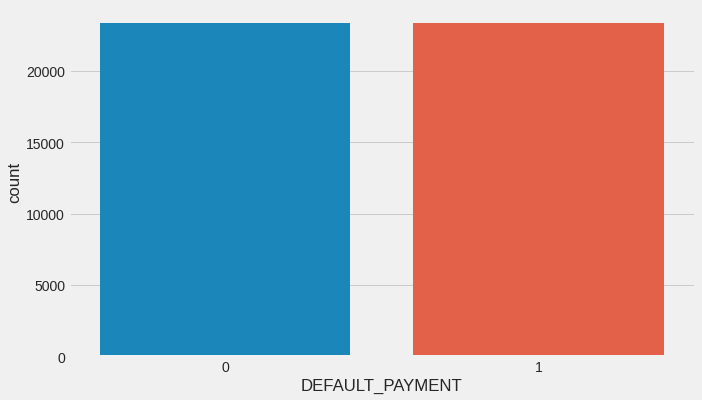

In [85]:
# Creating a count plot for "DEFAULT_PAYMENT"
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,6))
sns.countplot('DEFAULT_PAYMENT', data = balance_df)

In [86]:
balance_df[balance_df['DEFAULT_PAYMENT']==1]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_PAYMENT
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
13,70000,1,2,2,30,1,2,2,0,0,2,65802,67369,65701,66782,36137,36894,3200,0,3000,3000,1500,0,1
16,20000,1,1,2,24,0,0,2,2,2,2,15376,18010,17428,18338,17905,19104,3200,0,1500,0,1650,0,1
21,120000,2,2,1,39,-1,-1,-1,-1,-1,-1,316,316,316,0,632,316,316,316,0,632,316,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,200000,2,1,1,41,-1,-1,-1,-1,-2,-1,21585,1006,869,86,-359,1130,1013,872,89,286,2268,3,1
46724,140575,1,1,1,39,2,2,0,0,0,2,34461,33712,34759,35588,36682,37091,92,1884,1681,1696,1126,2925,1
46725,20000,1,2,2,23,0,0,0,0,1,0,6393,7510,8725,10278,10254,10290,1383,1500,1861,349,349,491,1
46726,50000,1,2,1,47,0,0,0,0,0,0,40847,41226,36385,32342,26653,22591,1767,1942,1557,2201,1151,1010,1


In [87]:
x_train_sm, x_test_sm, y_train_sm, y_test_sm = train_test_split(x_smote,y_smote, test_size = 0.2, random_state = 24,stratify = y_smote)

## Feature Engineering

In [89]:
# Creating a dummy copy of our dataset
df = balance_df.copy()

In [90]:
# Bin ‘AGE’ data to 6 groups
bins= [21,30,40,50,60,70,80]
labels = list(range(6))
df['AGE'] = pd.cut(df['AGE'],bins=bins, labels=labels,right=False)

In [91]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_PAYMENT
0,20000,2,2,1,0,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,0,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,1,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,1,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,3,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [92]:
# Define predictor variables and target variable
X = df.drop(columns=['DEFAULT_PAYMENT'])
y = df['DEFAULT_PAYMENT']

# Save all feature names as list
feature_cols = X.columns.tolist() 

# Extract numerical columns and save as a list for rescaling
X_num = X.drop(columns=['SEX', 'EDUCATION', 'MARRIAGE', 'AGE'])
num_cols = X_num.columns.tolist() 

In [94]:
# Define function to split data

def data_split(X, y):
  '''
  This function is used for splitting data into train and test.
  ''' 
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,shuffle=True, stratify=y, random_state=42)
  return X_train, X_test, y_train, y_test

In [95]:
# Define function to rescale training data using StandardScaler

def standard_scaler(X_train, X_test, numerical_cols):
    
  # Make copies of dataset
  X_train_std = X_train.copy()
  X_test_std = X_test.copy()
      
  # Apply standardization on numerical features only
  for i in numerical_cols:
    scl = StandardScaler().fit(X_train_std[[i]])     # fit on training data columns
    X_train_std[i] = scl.transform(X_train_std[[i]]) # transform the training data columns
    X_test_std[i] = scl.transform(X_test_std[[i]])   # transform the testing data columns
      
  return X_train_std,X_test_std

In [88]:
# Creating function for evaluating model.
def final_eval(test_class_preds,y_test):
  '''
  This function is used for accuracy, precision, recall, f1 and roc_auc scores.
  '''
  test_accuracy_lr = accuracy_score(test_class_preds,y_test)
  test_precision_score_lr = precision_score(test_class_preds,y_test)
  test_recall_score_lr = recall_score(test_class_preds,y_test)
  test_f1_score_lr = f1_score(test_class_preds,y_test)
  test_roc_score_lr = roc_auc_score(test_class_preds,y_test)

  print("The accuracy on test data is ", test_accuracy_lr)
  print("The precision on test data is ", test_precision_score_lr)
  print("The recall on test data is ", test_recall_score_lr)
  print("The f1 on test data is ", test_f1_score_lr)
  print("The roc_score on test data is ", test_roc_score_lr)

## Logistic Regression

In [98]:
def run_logistic_regression():
  # Split data  
  X_train, X_test, y_train, y_test = data_split(X, y)

  # Rescale data
  X_train_std, X_test_std = standard_scaler(X_train, X_test, numerical_cols = num_cols)
    
  # Instantiate model
  clf_lr = LogisticRegression()
    
  # Fit the model
  clf_lr.fit(X_train_std, y_train)

  # Get the predicted classes
  train_class_preds = clf_lr.predict(X_train)
  test_class_preds = clf_lr.predict(X_test)

  # Use model's default parameters to get cross validation score
  scores = final_eval(test_class_preds,y_test)
  return scores

In [99]:
run_logistic_regression()

The accuracy on test data is  0.49975033882587916
The precision on test data is  0.00042802111570837496
The recall on test data is  0.3
The f1 on test data is  0.0008548226243054565
The roc_score on test data is  0.3999464629880791
